<a href="https://colab.research.google.com/github/NicolasPham/DataAnalystProjects/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn Prediction
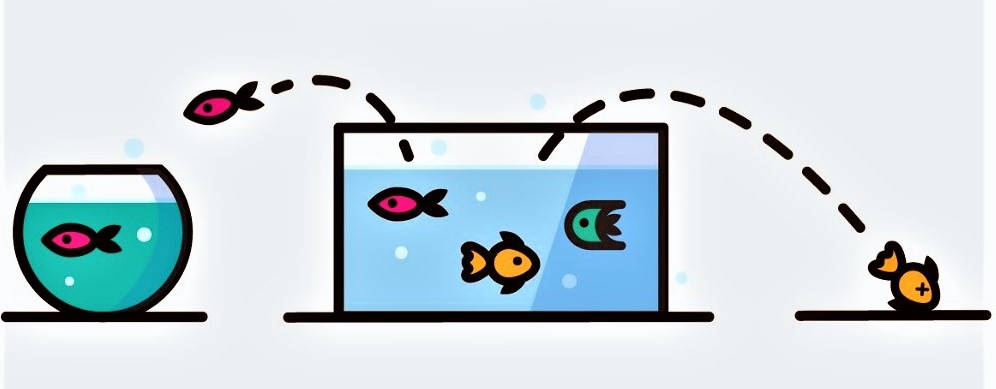

## What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

**Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.**

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels.As a result, by addressing churn, **these businesses may not only preserve their market position, but also grow and thrive.** More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## Objectives:
- Finding the % of Churn Customers and customers that keep in with the active services.
- Analysing the data in terms of various features responsible for customer Churn
 -Finding a most suited machine learning model for correct classification of Churn and non churn customers.

 ## Dataset:
 #### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Conclusion:
- There is 26.6% customers switched to another firm
- Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.
- 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract.
- Major customers who moved out were having Electronic Check as Payment Method. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.
- Customers without **Dependents** are more likely to Churn
- Most customers churn due to lack of **online security**
- Most of the senior citizens churn; the number of senior citizens are very less in over all customer base.
- Customers with **Paperless Billing** are most likely to churn.
- As shown in following chart, customers with **no TechSupport** are most likely to migrate to another service provider.

---
#### 1. Data Cleaning
- Convert TotalCharges to numeric and fill missing values with mean
- Drop all records with tenure = 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Dataset/TelecomCustomerChurn/TelecomCustomerChurn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Fill missing values in total charges with mean
df = df.fillna(df['TotalCharges'].mean())

In [ ]:
# Drop records where tenure = 0
df.drop(labels = df[df['tenure'] == 0].index, axis = 0, inplace = True)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
# Map value in SeniorCitizen as {0: 'No', 1: 'Yes'}
print('Unique value in SeniroCitizen: ' + str(df['SeniorCitizen'].nunique()))
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1:'Yes'})

Unique value in SeniroCitizen: 2


In [ ]:
df.InternetService.describe(include=["object", "bool"])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

---
#### 2. EDA (Exploratory Data Analysis)

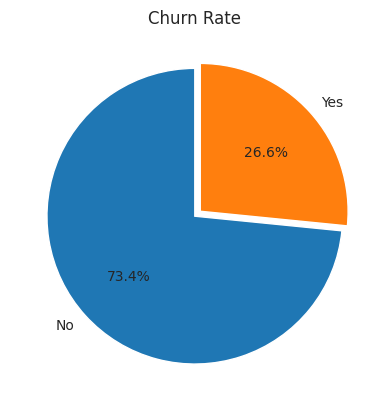

In [ ]:
churnRate = df['Churn'].value_counts().reset_index()

fig, ax = plt.subplots()
explode = (0,0.05)
ax.pie(churnRate.Churn, labels=churnRate['index'], autopct='%1.1f%%',
       explode = explode, startangle=90)
plt.title('Churn Rate')
plt.show()

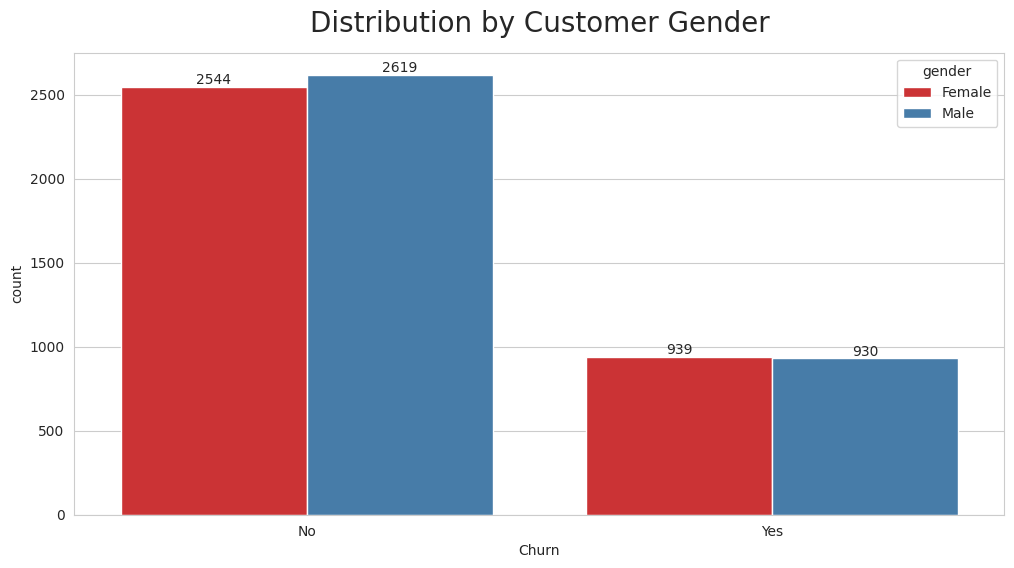

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.countplot(data = df, x = 'Churn', hue='gender', palette='Set1')
for container in ax.containers:
  ax.bar_label(container)
plt.title('Distribution by Customer Gender', fontsize=20, pad=15)
plt.show()

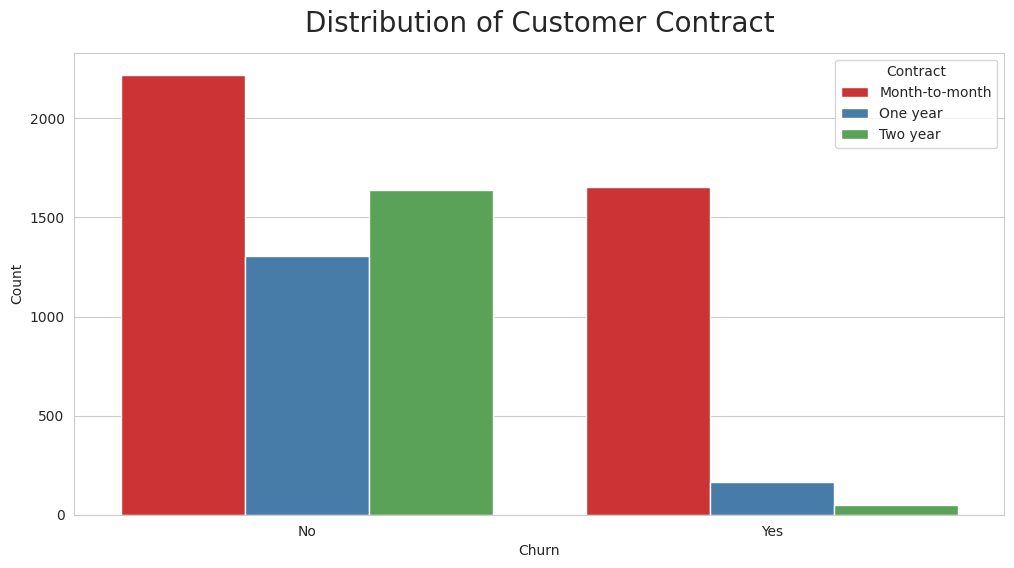

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'Churn', hue = 'Contract', palette = 'Set1')
plt.title('Distribution of Customer Contract', fontsize = 20, pad=15)
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
payment = df.PaymentMethod.value_counts().reset_index()
payment

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1604
2,Bank transfer (automatic),1542
3,Credit card (automatic),1521


In [ ]:
labels = payment['index'].values
values = payment['PaymentMethod'].values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

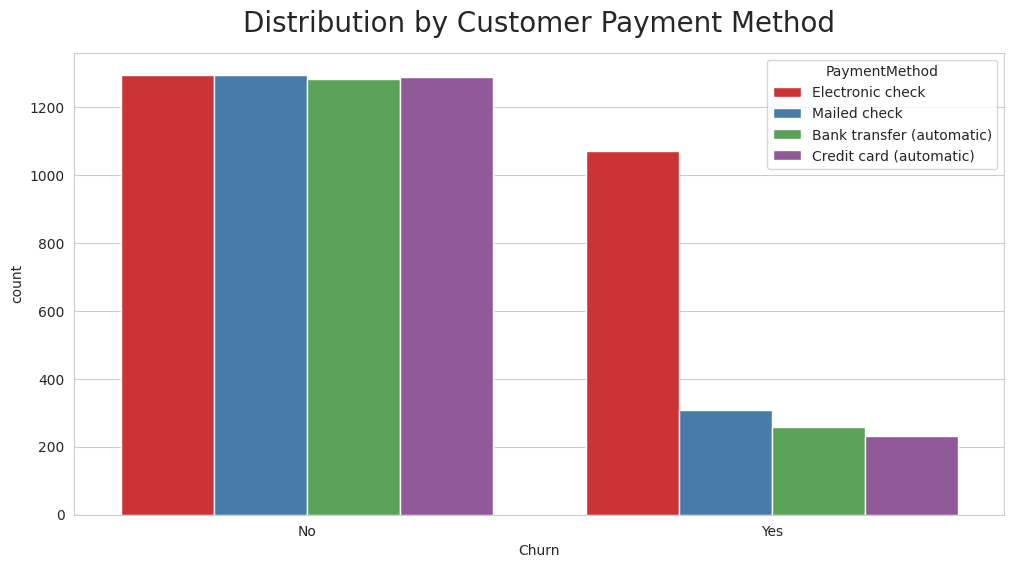

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x = 'Churn', hue='PaymentMethod', palette='Set1')
plt.title('Distribution by Customer Payment Method', fontsize=20, pad=15)
plt.show()

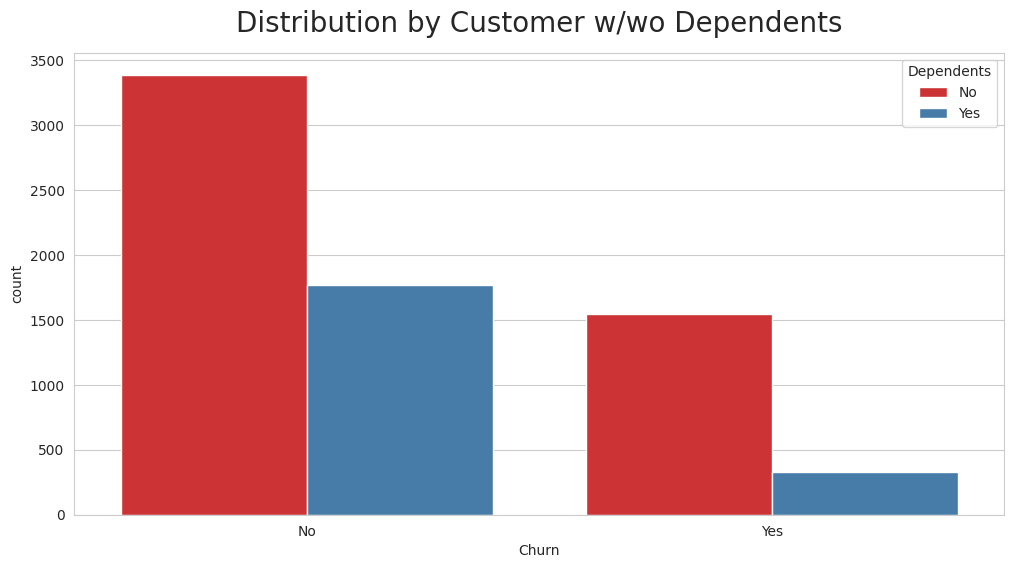

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='Churn', hue='Dependents', palette='Set1')
plt.title('Distribution by Customer w/wo Dependents', fontsize=20, pad=15)
plt.show()

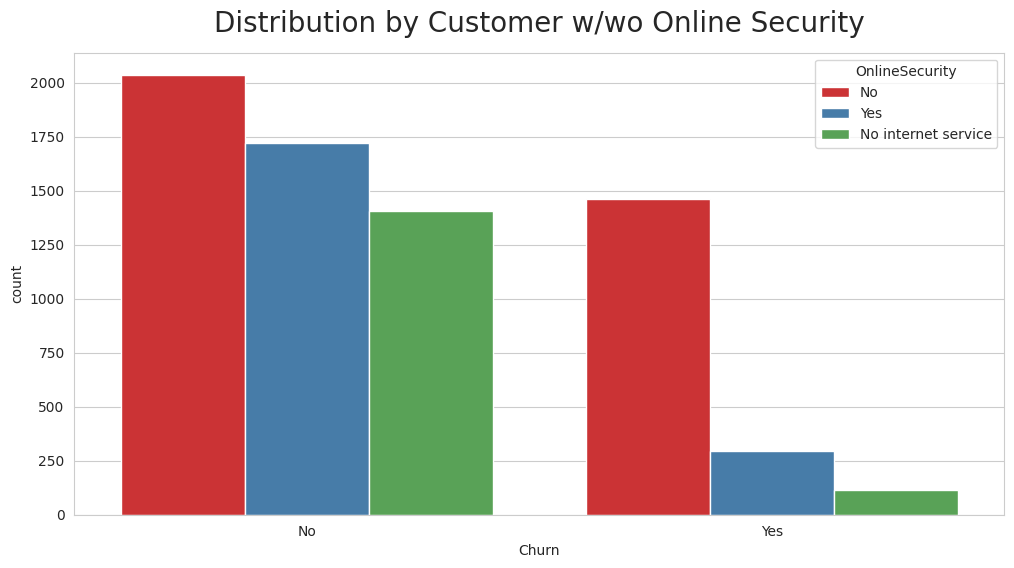

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='Churn', hue='OnlineSecurity', palette='Set1')
plt.title('Distribution by Customer w/wo Online Security', fontsize=20, pad=15)
plt.show()

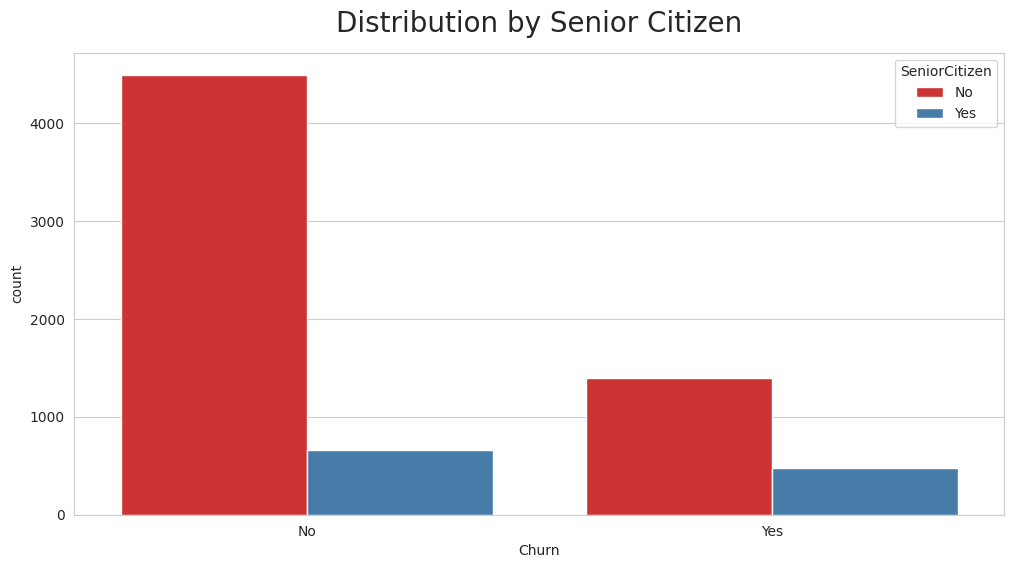

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='Churn', hue='SeniorCitizen', palette='Set1')
plt.title('Distribution by Senior Citizen', fontsize=20, pad=15)
plt.show()

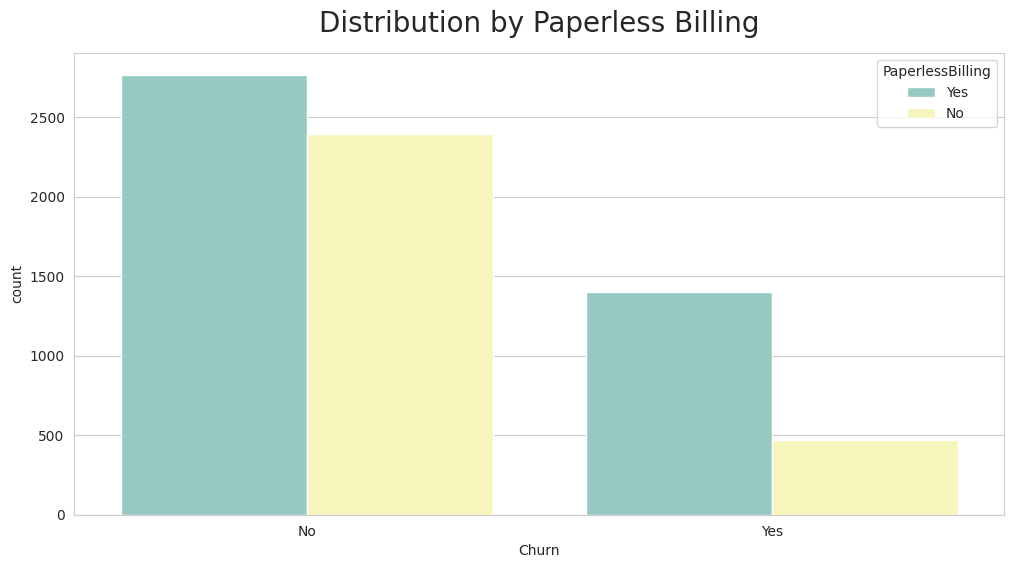

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='Churn', hue='PaperlessBilling', palette='Set3')
plt.title('Distribution by Paperless Billing', fontsize=20, pad=15)
plt.show()

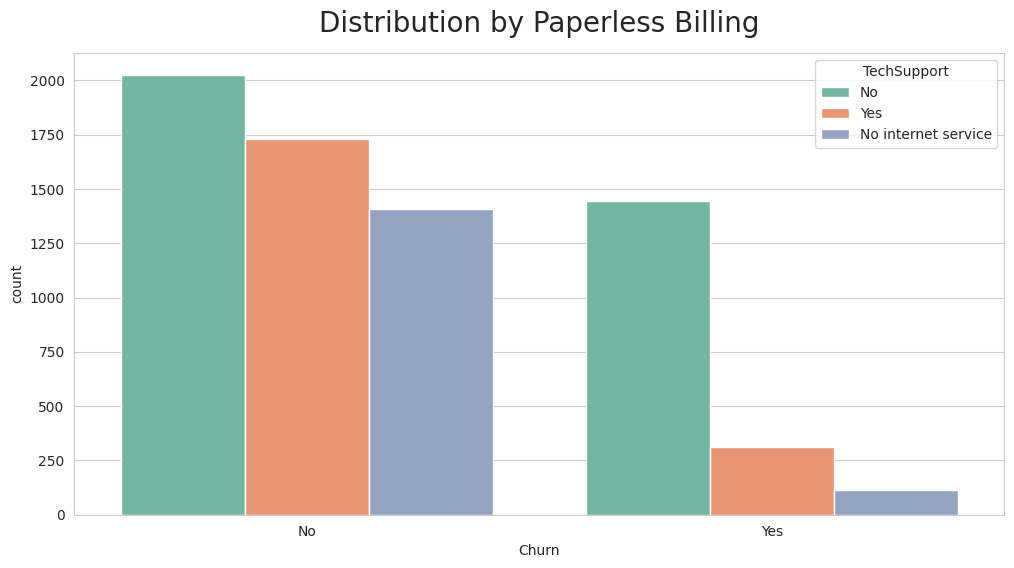

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='Churn', hue='TechSupport', palette='Set2')
plt.title('Distribution by Paperless Billing', fontsize=20, pad=15)
plt.show()

In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
